# Hypothesis Testing - Part 2. Comparing Means (t test)

The ANOVA of Test is a hypothesis test typically used to determine if 3 or more means are different.

**Assumptions**  

Conditions for Inference:  
1) Random Sample (Both  samples are random)    
2) Samples are Normal ( or can approximate normal if n >30 or underlying is approx symmetrical and not skewed 
3) Observations in sample are independant (Either done with replacement or less than 10% of population)



**Hypothesis**  
**Null:** Means are equal.  
**Alternative:** Means are not equal  
If the p value is less than the significance level then we can reject the null hypothesis.


The following Resources have been used:  


*This notebook is from a series on Hypothesis Testing* 
1. *Hypothesis Testing - Comparing Proportions (z test)*
2. ***Hypothesis Testing - Comparing Means (t test)***  
3. *Hypothesis Testing - Chi Sq*  
4. *Hypothesis Testing - ANOVA*  

#### Libraries

In [105]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the data 
Here we are using the stroke data set from kaggle

In [106]:
stroke = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [107]:
stroke['bmi'].isna().sum()

201

In [108]:
stroke_bmi = stroke.dropna(subset=(['bmi']))
# stroke
print("The mean bmi is {}".format(stroke_bmi['bmi'].mean()))
stroke_bmi.describe()

The mean bmi is 28.893236911794663


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 1. Confidence Intervals for difference in Means
#### Create a function to calculate the CI of the difference between means

In [109]:
def ci_two_means(x1,x2,sd1,sd2,n1,n2,tail,conf):

    se = np.sqrt((sd1**2/n1) + (sd2**2/n2))
   #df = min(n1,n2) -1
    
    dof = (sd1**2/n1 + sd2**2/n2)**2/ ((1/(n1-1)*(sd1**2/n1)**2 + (1/(n2-1)*(sd2**2/n2)**2)))
                                                                 
    if tail == 2:
        q = (1+conf)/2
    else:
        q= conf

    t = stats.t.ppf(q,dof)
    CI = round((x2-x1)-t*se,4), round((x2-x1)+t*se,4)
    
    print("There are {:.1f} degrees of freedom".format(dof))
    print("A t test has been calculated at {:.1%} confidence for the difference of two means: ".format(conf))
    print("{:.4f} and {:.4f} with respective sample sizes {} and {}. The t statistic is {:.3f}".format(x2, x1, n2,n1,t))
    if CI[0]<=0 and CI[1] >= 0:   
        print("We are {:.1%} confident that the difference in means is between {} and {}".format(conf, CI[0],CI[1])) 
        print("Because the confidence interval includes zero, we conclude that the difference is not statistically significant")
    else:
        print("We are {:.1%} confident that the difference in means is between {} and {}".format(conf, CI[0],CI[1])) 
        print("Because the confidence interval does not includes zero, we conclude that the difference is statistically significant")
    
    return CI


In [110]:
mean_m = stroke_bmi.query("gender == 'Male'")['bmi'].mean()
mean_f = stroke_bmi.query("gender == 'Female'")['bmi'].mean()
std_m = stroke_bmi.query("gender == 'Male'")['bmi'].std()
std_f= stroke_bmi.query("gender == 'Female'")['bmi'].std()
size_m = stroke_bmi.query("gender == 'Male'")['bmi'].count()
size_f = stroke_bmi.query("gender == 'Female'")['bmi'].count()

#95% CI
ci_two_means(mean_m,mean_f,std_m,std_f,size_m,size_f,2,0.95)

print ('\n')
#90% CI
ci_two_means(mean_m,mean_f,std_m,std_f,size_m,size_f,2,0.90)


There are 4538.8 degrees of freedom
A t test has been calculated at 95.0% confidence for the difference of two means: 
29.0658 and 28.6479 with respective sample sizes 2897 and 2011. The t statistic is 1.960
We are 95.0% confident that the difference in means is between -0.0224 and 0.858
Because the confidence interval includes zero, we conclude that the difference is not statistically significant


There are 4538.8 degrees of freedom
A t test has been calculated at 90.0% confidence for the difference of two means: 
29.0658 and 28.6479 with respective sample sizes 2897 and 2011. The t statistic is 1.645
We are 90.0% confident that the difference in means is between 0.0484 and 0.7872
Because the confidence interval does not includes zero, we conclude that the difference is statistically significant


(0.0484, 0.7872)

#### Plot the means to illustrate

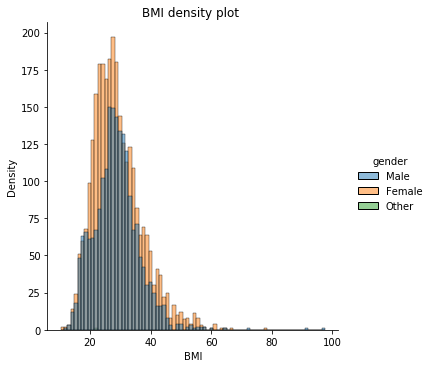

In [111]:
sns.displot(data = stroke_bmi, x = 'bmi', hue ='gender' )

plt.title('BMI density plot ')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.show()

## 2. Confidence Intervals for one Mean

#### Adapt the function to work for one population

In [112]:
def ci_one_mean(x1,sd1,n1,tail,conf):
    
    se = np.sqrt((sd1**2)/n1)   
    dof = n1-1
                                                                 
    if tail == 2:
        q = (1+conf)/2
    else:
        q= conf

    t = stats.t.ppf(q,dof)
    CI = round((x1)-t*se,4), round((x1)+t*se,4)
    print(t)
    print("There are {:.0f} degrees of freedom".format(dof))
    print("We are {:.1%} confident that the mean is between {} and {}".format(conf, CI[0],CI[1])) 

    return CI

In [113]:
# Male Confidence Interval - 90%
ci_one_mean(mean_m,std_m, size_m, 2,.90)

1.6456120727025103
There are 2010 degrees of freedom
We are 90.0% confident that the mean is between 28.374 and 28.9219


(28.374, 28.9219)

In [114]:
#Female Confidence Interval - 90%
ci_one_mean(mean_f,std_f, size_f, 2,.90)

1.645379959709201
There are 2896 degrees of freedom
We are 90.0% confident that the mean is between 28.8178 and 29.3137


(28.8178, 29.3137)

## 3. Hypothesis Testing Means

In [118]:
def compare_two_means(x1,x2,sd1,sd2,n1,n2,tail, alpha):
    
    x21 = x2-x1
    SE = np.sqrt((sd1**2/n1 + sd2**2/n2))
    critical_t = x21/SE

    dof = (sd1**2/n1 + sd2**2/n2)**2/ ((1/(n1-1)*(sd1**2/n1)**2 + (1/(n2-1)*(sd2**2/n2)**2)))
    p_val = tail*stats.t.cdf(-np.abs(critical_t), dof)
    if p_val <= alpha:
        print("We reject the Null Hypothesis with a pvalue {:2f}".format(p_val))
    else:
        print("We fail to reject the Null Hypothesis with a pvalue {:.4f}".format(p_val))
    
    print ("The t stat is {:.3f} , there are {:.1f} degrees of freedom".format( critical_t, dof))

    return 

In [119]:
compare_two_means(mean_m,mean_f,std_m,std_f,size_m,size_f,2,0.1)


We reject the Null Hypothesis with a pvalue 0.062830
The t stat is 1.861 , there are 4538.8 degrees of freedom
